In [1]:
import io
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import datetime
from pandas import Series, DataFrame

In [2]:
uploaded = files.upload()

Saving 1-2000TextDown_20210322_pm010735_2000.xlsx to 1-2000TextDown_20210322_pm010735_2000 (4).xlsx
Saving 2001-4000TextDown_20210322_pm011625_2000.xlsx to 2001-4000TextDown_20210322_pm011625_2000 (4).xlsx
Saving 4001-6000TextDown_20210322_pm012705_2000.xlsx to 4001-6000TextDown_20210322_pm012705_2000 (4).xlsx
Saving 6001-8000TextDown_20210322_pm013957_2000.xlsx to 6001-8000TextDown_20210322_pm013957_2000 (4).xlsx
Saving 8001-10000TextDown_20210322_pm014511_2000.xlsx to 8001-10000TextDown_20210322_pm014511_2000 (4).xlsx
Saving 10001-12000TextDown_20210323_pm014026_2000.xlsx to 10001-12000TextDown_20210323_pm014026_2000 (4).xlsx
Saving 12001-14000TextDown_20210323_pm014212_2000.xlsx to 12001-14000TextDown_20210323_pm014212_2000 (4).xlsx
Saving 14001-16000TextDown_20210323_pm014355_2000.xlsx to 14001-16000TextDown_20210323_pm014355_2000 (4).xlsx
Saving 16001-17049TextDown_20210323_pm014532_1049.xlsx to 16001-17049TextDown_20210323_pm014532_1049 (4).xlsx


In [3]:
df_1 = pd.read_excel(io.BytesIO(uploaded.get('1-2000TextDown_20210322_pm010735_2000.xlsx')))
df_2 = pd.read_excel(io.BytesIO(uploaded.get('2001-4000TextDown_20210322_pm011625_2000.xlsx')))
df_3 = pd.read_excel(io.BytesIO(uploaded.get('4001-6000TextDown_20210322_pm012705_2000.xlsx')))
df_4 = pd.read_excel(io.BytesIO(uploaded.get('6001-8000TextDown_20210322_pm013957_2000.xlsx')))
df_5 = pd.read_excel(io.BytesIO(uploaded.get('8001-10000TextDown_20210322_pm014511_2000.xlsx')))
df_6 = pd.read_excel(io.BytesIO(uploaded.get('10001-12000TextDown_20210323_pm014026_2000.xlsx')))
df_7 = pd.read_excel(io.BytesIO(uploaded.get('12001-14000TextDown_20210323_pm014212_2000.xlsx')))
df_8 = pd.read_excel(io.BytesIO(uploaded.get('14001-16000TextDown_20210323_pm014355_2000.xlsx')))
df_9 = pd.read_excel(io.BytesIO(uploaded.get('16001-17049TextDown_20210323_pm014532_1049.xlsx')))

In [4]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9], sort=False)

In [5]:
len(df)

17049

In [6]:
df.head()

,국가코드,DB종류,특허/실용 구분,문헌종류 코드,발명의 명칭,요약,대표청구항,청구항 수,출원번호,출원일,공개번호/공표/재공표,공개일,등록번호,등록일,출원인,출원인 국적,발명자/고안자,우선권 번호,우선권 국가,우선권 주장일,WIPS ON key,출원인수
0,KR,KR,P,A,블루투스-초광대역 동기화,UWB 무선 통신 장치들이 좁은 송신/수신 윈도우들 내에서 동작할 수 있게 하기 위...,"무선 통신 디바이스로서, 제1 무선 통신 장치(radio) - 상기 제1 무선 통신...",20.0,10-2020-0111671,2020-09-02,10-2021-0029682,2021-03-16,NaN,NaN,애플 인크.,US,"하리하란, 스리람 | 와사다, 랭포드 엠.",62/897100 | 16/745208,US | US,2019-09-06 | 2020-01-16,3521121001015,1
1,US,US,P,B2,LED desk light having more than one function,The LED desk light has more than one function ...,1. A desk or table or cabinet top LED light ha...,16.0,14/951872,2015-11-25,2016-0153650,2016-06-02,10948175,2021-03-16,Tseng-Lu Chien,US,Tseng-Lu Chien,NaN,NaN,NaN,4921012003516,1
2,US,US,P,B2,System and method to protect original music fr...,Provided is a new digital music storage and re...,1. A piracy-resistant music packaging and play...,20.0,16/101424,2018-08-11,2019-0050542,2019-02-14,10949508,2021-03-16,"PRODUCTIONPAL, LLC",US,Wayne T. Armstrong | Jamie M. Boxell | Robert ...,NaN,NaN,NaN,4921012004836,1
3,US,US,P,B2,Ephemeral geofence campaign system,Systems and methods for modifying campaign dep...,"1. A method comprising: creating, by a process...",20.0,16/517801,2019-07-22,2019-0340651,2019-11-07,10949884,2021-03-16,International Business Machines Corporation,US,Andrew B. Cornwall | Lisa Seacat DeLuca | Pooj...,NaN,NaN,NaN,4921012005208,1
4,US,US,P,B2,"Bluetooth speaker base, method and system for ...",The present disclosure provides a Bluetooth sp...,1. A method for controlling a Bluetooth speake...,12.0,16/813070,2020-03-09,2020-0402513,2020-12-24,10950238,2021-03-16,"BAIDU ONLINE NETWORK TECHNOLOGY (BEIJING) CO.,...",CN,Xujie Zhu | Jingran Li | Chao Tian | Shoukuan ...,2019-10532552,CN,2019-06-19,4921012005561,1


In [7]:
print(df.head().T)

                                                              0  ...                                                  4
국가코드                                                         KR  ...                                                 US
DB종류                                                         KR  ...                                                 US
특허/실용 구분                                                      P  ...                                                  P
문헌종류 코드                                                       A  ...                                                 B2
발명의 명칭                                            블루투스-초광대역 동기화  ...  Bluetooth speaker base, method and system for ...
요약            UWB 무선 통신 장치들이 좁은 송신/수신 윈도우들 내에서 동작할 수 있게 하기 위...  ...  The present disclosure provides a Bluetooth sp...
대표청구항         무선 통신 디바이스로서, 제1 무선 통신 장치(radio) - 상기 제1 무선 통신...  ...  1. A method for controlling a Bluetooth speake...
청구항 수                                   

In [8]:
nations = list(df['국가코드'].unique())

In [9]:
for nation in nations :
  print(nation, end=' ')
  print(len(df[df['국가코드'] == nation]))

KR 5475
US 8376
EP 1871
JP 1327


In [10]:
df['출원일'] = pd.to_datetime(df['출원일'], format="%Y/%m/%d")

In [11]:
df['Year'] = df['출원일'].dt.strftime('%Y')

In [12]:
df['Year'].unique()

array(['2020', '2015', '2018', '2019', '2017', '2016', '2011', '2012',
       '2014', '2021', '2013', '2009', '2010', '2002', '2007', nan,
       '2003', '2000', '2008', '2005', '2006', '2001', '2004'],
      dtype=object)

In [13]:
df = df.dropna(axis=0, subset=['Year'])

In [14]:
df['Year'].unique()

array(['2020', '2015', '2018', '2019', '2017', '2016', '2011', '2012',
       '2014', '2021', '2013', '2009', '2010', '2002', '2007', '2003',
       '2000', '2008', '2005', '2006', '2001', '2004'], dtype=object)

In [15]:
df = df[df['Year'].astype(int) >= 2011]

In [16]:
df = df[df['Year'].astype(int) < 2021]

In [17]:
df['Year'].unique()

array(['2020', '2015', '2018', '2019', '2017', '2016', '2011', '2012',
       '2014', '2013'], dtype=object)

In [18]:
years = df['Year'].unique()
sum_year = {}

In [19]:
print(df.groupby('Year'))

In [20]:
plot1 = df.groupby('Year', as_index=False).size()
plot1 = DataFrame(plot1)

In [21]:
plot1

,Year,size
0,2011,998
1,2012,981
2,2013,1039
3,2014,1127
4,2015,1647
5,2016,2092
6,2017,2193
7,2018,2201
8,2019,1883
9,2020,751


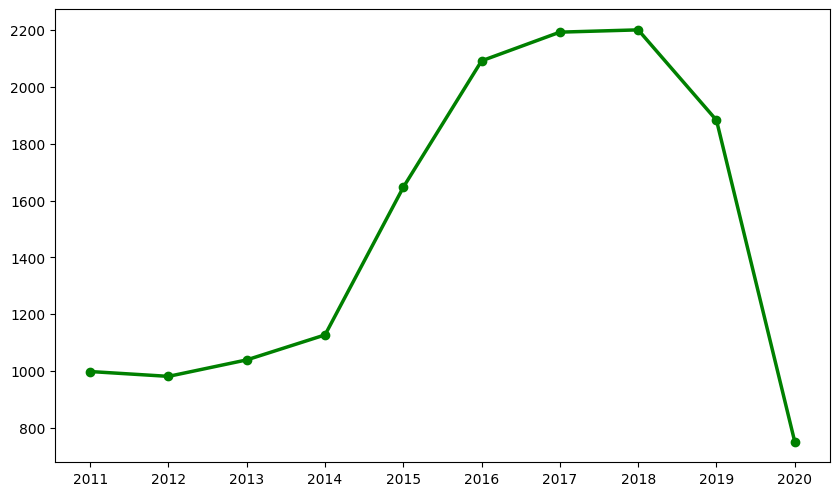

In [22]:
#plot1.T.plot(xlabel='year', ylabel='number of applications')
plt.xlabel='연도'
plt.ylabel='number of applications'
plt.title = '연도별 특허 출원수'
plt.figure(figsize=(10,6), dpi=100)
plt.plot(plot1['Year'], plot1['size'], linewidth=2.5, c='g')
plt.scatter(plot1['Year'], plot1['size'], c='g')

In [23]:
plot2 = df.groupby(['국가코드','Year'], as_index=False).size()
#plot2 = df.groupby(['국가코드','Year']).size()

In [24]:
plot2

,국가코드,Year,size
0,EP,2011,124
1,EP,2012,143
2,EP,2013,131
3,EP,2014,152
4,EP,2015,197
5,EP,2016,234
6,EP,2017,183
7,EP,2018,199
8,EP,2019,132
9,EP,2020,16


In [25]:
plot2[plot2['국가코드']=='EP']['Year']

0    2011
1    2012
2    2013
3    2014
4    2015
5    2016
6    2017
7    2018
8    2019
9    2020
Name: Year, dtype: object

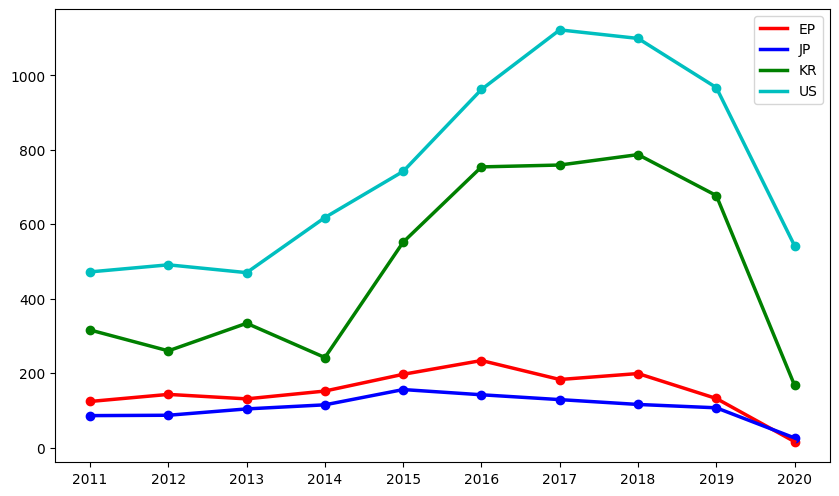

In [26]:
plt.figure(figsize=(10,6), dpi=100)
plt.plot(plot2[plot2['국가코드']=='EP']['Year'], plot2[plot2['국가코드']=='EP']['size'],'r', label='EP', linewidth=2.5)
plt.scatter(plot2[plot2['국가코드']=='EP']['Year'], plot2[plot2['국가코드']=='EP']['size'], c='r')
plt.plot(plot2[plot2['국가코드']=='JP']['Year'], plot2[plot2['국가코드']=='JP']['size'],'b', label='JP', linewidth=2.5)
plt.scatter(plot2[plot2['국가코드']=='JP']['Year'], plot2[plot2['국가코드']=='JP']['size'], c='b')
plt.plot(plot2[plot2['국가코드']=='KR']['Year'], plot2[plot2['국가코드']=='KR']['size'],'g', label='KR', linewidth=2.5)
plt.scatter(plot2[plot2['국가코드']=='KR']['Year'], plot2[plot2['국가코드']=='KR']['size'], c='g')
plt.plot(plot2[plot2['국가코드']=='US']['Year'], plot2[plot2['국가코드']=='US']['size'],'c', label='US', linewidth=2.5)
plt.scatter(plot2[plot2['국가코드']=='US']['Year'], plot2[plot2['국가코드']=='US']['size'], c='c')
plt.legend()

In [27]:
plot3 = df.groupby(['국가코드'], as_index=False).size()
plot3

,국가코드,size
0,EP,1511
1,JP,1068
2,KR,4848
3,US,7485


([<matplotlib.patches.Wedge at 0x7f806fa50190>,
 [Text(1.1397110616438442, 0.37557781612691327, 'EP'),
  Text(0.7814117984484005, 0.9107115905958574, 'JP'),
  Text(-0.5885144986378601, 0.9880033830372386, 'KR'),
  Text(-0.007025958592711501, -1.1499785371500868, 'US')],
 [Text(0.6648314526255757, 0.21908705940736606, '10.1%'),
  Text(0.4558235490949002, 0.5312484278475835, '7.2%'),
  Text(-0.33263862966487745, 0.5584366947601782, '32.5%'),
  Text(-0.003971193987184761, -0.6499878688239621, '50.2%')])

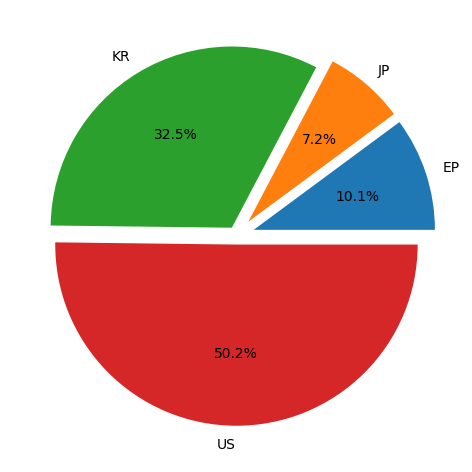

In [28]:
plt.figure(figsize=(10,6), dpi=100)
explode = [0.1, 0.1, 0.05, 0.05]
plt.pie(plot3['size'], labels=plot3['국가코드'], autopct='%.1f%%', explode=explode)

In [29]:
plot1

,Year,size
0,2011,998
1,2012,981
2,2013,1039
3,2014,1127
4,2015,1647
5,2016,2092
6,2017,2193
7,2018,2201
8,2019,1883
9,2020,751


In [30]:
raw_data = {'출원건수' : [1979,2166,3739,4394,2634],
            '증가율' : [0,0.09449, 0.72622, 0.17518,-0.40054]}

plot4 = DataFrame(raw_data)
plot4

,출원건수,증가율
0,1979,0.00000
1,2166,0.09449
2,3739,0.72622
3,4394,0.17518
4,2634,-0.40054


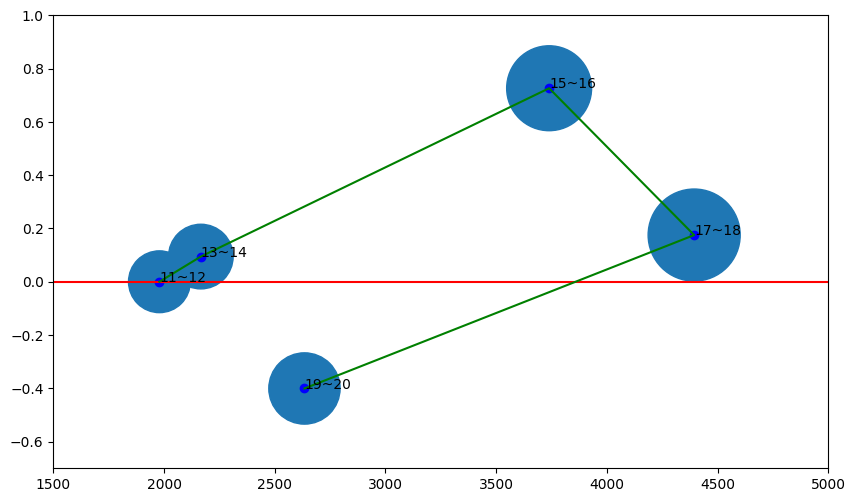

In [31]:
plt.figure(figsize=(10,6), dpi=100)
plt.xlim(1500,5000)
plt.ylim(-0.7,1.0)
plt.axhline(y=0, color = 'r')
plt.scatter(plot4['출원건수'], plot4['증가율'], s=plot4['출원건수'])
plt.scatter(plot4['출원건수'], plot4['증가율'], c='b')
plt.plot(plot4['출원건수'], plot4['증가율'], c='g')
plot4['index'] = ['11~12','13~14','15~16','17~18','19~20']
for i, txt in enumerate(plot4['index']):
    plt.annotate(txt, (plot4['출원건수'][i], plot4['증가율'][i]), c='black')

In [32]:
df = df.reset_index()

In [33]:
df['출원인수']

0        1
1        1
2        1
3        1
4        1
        ..
14907    1
14908    1
14909    1
14910    1
14911    1
Name: 출원인수, Length: 14912, dtype: int64

In [34]:
df = df.dropna(axis=0, subset=['출원인수'])

In [35]:
plot5 = df.groupby(['Year'], as_index=False)['출원인수'].sum()
plot5

,Year,출원인수
0,2011,1079
1,2012,1121
2,2013,1168
3,2014,1243
4,2015,1848
5,2016,2298
6,2017,2467
7,2018,2421
8,2019,2027
9,2020,799


In [36]:
temp_plot = df.groupby(['Year'], as_index=False).size()
plot5['출원건수'] = temp_plot['size']
plot5

,Year,출원인수,출원건수
0,2011,1079,998
1,2012,1121,981
2,2013,1168,1039
3,2014,1243,1127
4,2015,1848,1647
5,2016,2298,2092
6,2017,2467,2193
7,2018,2421,2201
8,2019,2027,1883
9,2020,799,751


TypeError: ignored

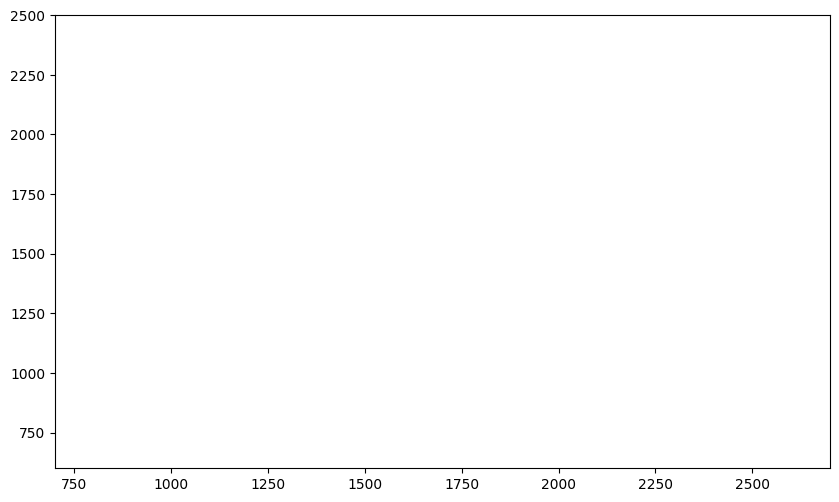

In [37]:
plt.figure(figsize=(10,6), dpi=100)
plt.xlim(700,2700)
plt.ylim(600,2500)
plt.xlabel('applicators')
plt.ylabel('applications')
plt.scatter(plot5['출원인수'], plot5['출원건수'], s=plot5['출원건수'])
plt.scatter(plot5['출원인수'], plot5['출원건수'], c='b')
plt.plot(plot5['출원인수'], plot5['출원건수'], c='g')
for i, txt in enumerate(plot5['Year']):
    plt.annotate(txt, (plot5['출원인수'][i], plot5['출원건수'][i]))

In [ ]:
df = df.dropna(axis=0, subset=['등록번호'])
plot6 = df.groupby(['Year'], as_index=False).size()
plot6

In [ ]:
temp_list = []
temp_size = 0
for i in range(len(plot6)):
  temp_size = temp_size + plot6['size'][i]
  temp_list.append(temp_size)

temp_list

In [ ]:
plot6['누적등록수'] = temp_list
plot6